# 逻辑回归添加多项式特征

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from code.LogisticRegression import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

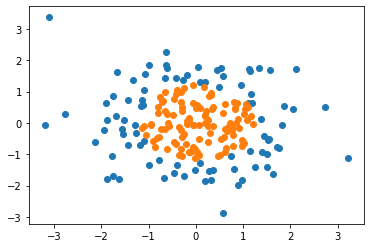

In [2]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2<1.5,dtype='int')
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [3]:
def polyLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std',StandardScaler()),
        ('log_reg',LogisticRegression())        
    ])

In [4]:
poly_log_reg = polyLogisticRegression(2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 <code.LogisticRegression.LogisticRegression object at 0x000002377A997988>)],
         verbose=False)

In [5]:
poly_log_reg.score(X, y)

0.95

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

J:\anacoda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


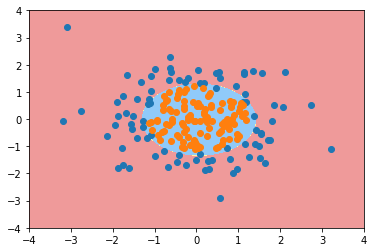

In [7]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()